In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
import mne
import random
from sklearn.metrics import classification_report
from numpy import zeros, newaxis
from scipy import signal
from scipy import fftpack


Bad key "text.kerning_factor" on line 4 in
C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [15]:
MDD_dataset_Filenames = os.listdir('./full_dataset/MDD/EC/')
H_dataset_Filenames = os.listdir('./full_dataset/H/EC/')

MDD_dataset_list = []
H_dataset_list = []

for filename in MDD_dataset_Filenames:
    data = mne.io.read_raw_edf('./full_dataset/MDD/EC/' + str(filename), verbose=0)
    MDD_dataset_list.append(data)  
    
for filename in H_dataset_Filenames:
    data = mne.io.read_raw_edf('./full_dataset/H/EC/' + str(filename), verbose=0)
    H_dataset_list.append(data)  
MDD_dataset_Filenames[0:29]
H_dataset_Filenames[0:29]

['H S1 EC.edf',
 'H S10 EC.edf',
 'H S11 EC.edf',
 'H S12  EC.edf',
 'H S13 EC.edf',
 'H S14 EC.edf',
 'H S15 EC.edf',
 'H S16 EC.edf',
 'H S17 EC.edf',
 'H S19 EC.edf',
 'H S2 EC.edf',
 'H S20 EC.edf',
 'H S21 EC.edf',
 'H S22 EC.edf',
 'H S23 EC.edf',
 'H S24 EC.edf',
 'H S25 EC.edf',
 'H S26 EC.edf',
 'H S27 EC.edf',
 'H S28 EC.edf',
 'H S29 EC.edf',
 'H S3 EC.edf',
 'H S30 EC.edf',
 'H S4 EC.edf',
 'H S5 EC.edf',
 'H S6 EC.edf',
 'H S7 EC.edf',
 'H S8 EC.edf',
 'H S9 EC.edf']

In [16]:
MDD_dataframe = [] #MDD 환자의 데이터프레임 리스트
H_dataframe = [] #건강한 사람의 데이터프레임 리스트
y = []
eeg_columns = ['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE',
 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE']
for raw in MDD_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(T_data, columns = channels, index = time)
    temp = temp[eeg_columns]
    MDD_dataframe.append(temp.iloc[:30720]) #256 * 120 = 2min
    y.append(1)
    
for raw in H_dataset_list:
    raw_data = raw.get_data(return_times=True)
    channels = raw.ch_names
    T_data = np.transpose(raw_data[0])
    time = np.transpose(raw_data[1])
    temp = pd.DataFrame(temp)
    temp = temp[eeg_columns]
    H_dataframe.append(temp.iloc[:30720]) #256 * 120 = 2min
    y.append(0)
y = np.asarray(y)    
MDD_dataframe[0]

,EEG Fp1-LE,EEG F3-LE,EEG C3-LE,EEG P3-LE,EEG O1-LE,EEG F7-LE,EEG T3-LE,EEG T5-LE,EEG Fz-LE,EEG Fp2-LE,EEG F4-LE,EEG C4-LE,EEG P4-LE,EEG O2-LE,EEG F8-LE,EEG T4-LE,EEG T6-LE,EEG Cz-LE,EEG Pz-LE
0.000000,3.850294e-06,-0.000002,-0.000002,-5.500420e-07,-1.650126e-06,-7.450568e-06,4.500343e-07,-2.450187e-06,2.750210e-06,4.550347e-06,5.000381e-08,3.550271e-06,0.000007,2.500191e-07,5.450416e-06,0.000006,0.000003,2.500191e-07,0.000003
0.003906,2.250172e-06,-0.000004,-0.000001,3.500267e-07,-1.500114e-07,-7.750591e-06,-1.150088e-06,-2.450187e-06,4.500343e-07,2.650202e-06,-2.550195e-06,3.750286e-06,0.000008,2.050156e-06,8.550652e-06,0.000007,0.000004,-5.500420e-07,0.000006
0.007812,-5.000381e-08,-0.000005,-0.000002,8.500649e-07,5.500420e-07,-5.250401e-06,-2.650202e-06,-2.250172e-06,-2.250172e-06,5.000381e-08,-4.950378e-06,2.950225e-06,0.000008,3.450263e-06,8.950683e-06,0.000008,0.000005,-1.750134e-06,0.000006
0.011719,-2.350179e-06,-0.000005,-0.000002,1.050080e-06,9.500725e-07,-2.050156e-06,-3.750286e-06,-2.050156e-06,-4.450340e-06,-2.250172e-06,-5.950454e-06,2.350179e-06,0.000007,4.250324e-06,6.750515e-06,0.000006,0.000005,-2.750210e-06,0.000005
0.015625,-3.650278e-06,-0.000005,-0.000002,9.500725e-07,1.150088e-06,-1.500114e-07,-4.550347e-06,-1.650126e-06,-5.450416e-06,-3.450263e-06,-5.350408e-06,2.450187e-06,0.000005,4.750362e-06,3.250248e-06,0.000003,0.000006,-3.150240e-06,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119.980469,-1.350103e-06,0.000004,0.000003,5.500420e-07,1.150088e-06,2.650202e-06,2.150164e-06,7.500572e-07,3.450263e-06,1.850141e-06,3.050233e-06,4.500343e-07,0.000002,4.150317e-06,6.350484e-06,0.000006,0.000004,1.450111e-06,0.000002
119.984375,-1.050080e-06,0.000003,0.000004,1.950149e-06,2.150164e-06,2.450187e-06,3.050233e-06,2.050156e-06,2.050156e-06,7.500572e-07,2.250172e-06,-1.650126e-06,0.000002,3.950301e-06,4.750362e-06,0.000007,0.000004,5.000381e-08,0.000003
119.988281,4.500343e-07,0.000002,0.000005,3.950301e-06,2.650202e-06,2.450187e-06,5.250401e-06,3.350256e-06,1.750134e-06,5.000381e-08,2.850217e-06,-1.250095e-06,0.000004,3.850294e-06,2.350179e-06,0.000007,0.000005,1.500114e-07,0.000005
119.992188,2.050156e-06,0.000002,0.000007,6.050462e-06,2.650202e-06,2.550195e-06,7.550576e-06,4.650355e-06,2.250172e-06,-2.500191e-07,4.250324e-06,1.550118e-06,0.000006,3.750286e-06,4.500343e-07,0.000008,0.000006,1.550118e-06,0.000007


In [17]:
#MDD[26]환자 열 개수 조정
MDD_dataframe[26] = MDD_dataframe[26][MDD_dataframe[0].columns]


In [18]:
low_pass_filter = signal.firwin(101, cutoff=32, fs=256, pass_zero='lowpass')
high_pass_filter = signal.firwin(101, cutoff=0.5, fs=256, pass_zero='highpass')

In [19]:
for j in range(0, len(MDD_dataframe)):
    col = list(MDD_dataframe[j].columns)
    for i in range(0, len(col)):
        clear_eeg = signal.lfilter(low_pass_filter, [1.0], MDD_dataframe[j][col[i]])
        clear_eeg = signal.lfilter(high_pass_filter, [1.0], clear_eeg)
        MDD_dataframe[j][col[i]] = clear_eeg

In [20]:
for j in range(0, len(H_dataframe)):
    col = list(H_dataframe[j].columns)
    for i in range(0, len(col)):
        clear_eeg = signal.lfilter(low_pass_filter, [1.0], H_dataframe[j][col[i]])
        clear_eeg = signal.lfilter(high_pass_filter, [1.0], clear_eeg)
        H_dataframe[j][col[i]] = clear_eeg

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
all_dataframe = MDD_dataframe + H_dataframe


In [22]:
delta_pass_filter =  signal.firwin(101, cutoff=[0.5,4], fs=256, pass_zero='bandpass')
theta_pass_filter =  signal.firwin(101, cutoff=[4,8], fs=256, pass_zero='bandpass')
alpha_pass_filter =  signal.firwin(101, cutoff=[8,13], fs=256, pass_zero='bandpass')
beta_pass_filter =  signal.firwin(101, cutoff=[13,30], fs=256, pass_zero='bandpass')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
def band_power(channel):
    df = pd.DataFrame()
    df['delta'] = signal.lfilter(delta_pass_filter, [1.0], channel)
    df['theta'] = signal.lfilter(theta_pass_filter, [1.0], channel)
    df['alpha'] = signal.lfilter(alpha_pass_filter, [1.0], channel)
    df['beta'] = signal.lfilter(beta_pass_filter, [1.0], channel)
    
    return df


In [23]:
def eeg_band_power_seperate(input_dataframe, train):
    scaler = Normalizer()
    X = np.zeros((1,19,4,30720))
    for dataframe in input_dataframe:
        columns = list(dataframe.columns)
        band_power_list = np.zeros((1,4,30720))
        #band_power_list = band_power_list[newaxis,:,:]
        for i in range(len(columns)):
            ch = band_power(dataframe[dataframe.columns[i]])
            ch = scaler.fit_transform(ch) #Nor
            ch = np.asarray(ch)
            band_power_list = np.vstack([band_power_list, ch.T[newaxis,:,:]])
        band_power_list = band_power_list[1:]
        X = np.vstack([X, band_power_list[newaxis,:,:,:]])
        #print(X.shape, end="/")
    return X

In [24]:
from sklearn.metrics import roc_curve
from keras import models
from keras import layers
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [25]:
def index_to_list(list, index):
    return [list[i] for i in index]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_dataframe, y, test_size=0.3, random_state = 7)

In [27]:
X_train = eeg_band_power_seperate(X_train, 1)

In [28]:
X_test = eeg_band_power_seperate(X_test, 0)

In [29]:
X_train = X_train[1:]
X_test = X_test[1:]
X_train.shape
y_test

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [30]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

In [31]:
from keras.optimizers import Adam
def conv2d_model():
    opt = Adam(lr=0.00001)
    model = models.Sequential()

            #1
    model.add(layers.Conv2D(64, 4, 4,
                            border_mode='same',
                            activation='relu',
                            input_shape=(19,4,30720)))
    model.add(layers.Dropout(0.5))
    model.add(layers.MaxPooling2D(pool_size=(2,2),padding = 'same'))

            ##-- layer 4
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))


    model.compile(optimizer=opt,
                    loss='binary_crossentropy',
                    metrics=['accuracy', recall_m, precision_m, f1_m])
    return model

In [37]:
K.clear_session()

In [38]:
model = conv2d_model()
history = model.fit(X_train, y_train, epochs=20, batch_size=4, verbose=1, validation_data = (X_test, y_test))
history_dict = history.history

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(19, 4, 30..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


Train on 41 samples, validate on 18 samples
Epoch 1/20
41/41 [==============================] - 2s 58ms/step - loss: 0.6316 - accuracy: 0.6098 - recall_m: 0.2576 - precision_m: 0.5000 - f1_m: 0.3242 - val_loss: 0.4200 - val_accuracy: 0.5556 - val_recall_m: 0.2000 - val_precision_m: 0.4000 - val_f1_m: 0.2667
Epoch 2/20
41/41 [==============================] - 2s 52ms/step - loss: 0.2980 - accuracy: 0.9024 - recall_m: 0.6970 - precision_m: 0.8182 - f1_m: 0.7394 - val_loss: 0.3993 - val_accuracy: 0.6111 - val_recall_m: 0.2500 - val_precision_m: 0.6000 - val_f1_m: 0.3467
Epoch 3/20
41/41 [==============================] - 2s 52ms/step - loss: 0.3933 - accuracy: 0.9024 - recall_m: 0.8636 - precision_m: 0.8333 - f1_m: 0.8303 - val_loss: 0.3885 - val_accuracy: 0.6667 - val_recall_m: 0.3000 - val_precision_m: 0.6000 - val_f1_m: 0.4000
Epoch 4/20
41/41 [==============================] - 2s 52ms/step - loss: 0.3493 - accuracy: 0.8780 - recall_m: 0.7727 - precision_m: 0.8636 - f1_m: 0.7939 - val_

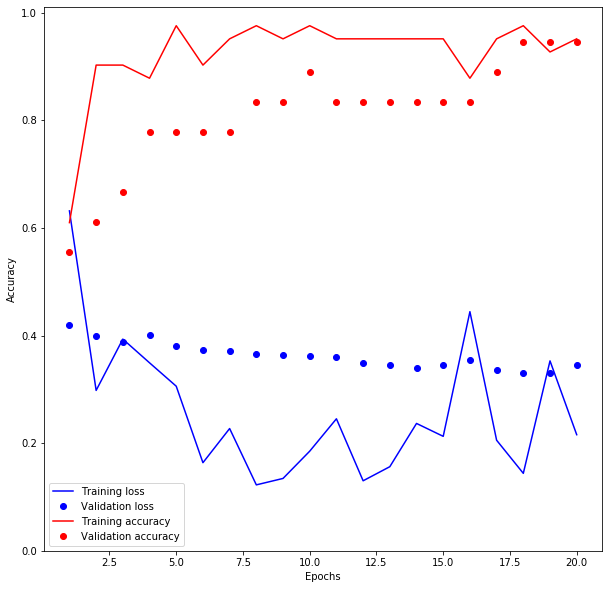

In [39]:
loss = history_dict['loss']   
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']   
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(val_loss) + 1)
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ro', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.01)
plt.legend()

In [41]:
model.save('MDD_model.h5')

# K-fold Val

In [42]:
accuracy_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
import keras.backend.tensorflow_backend as Keras_GPU
from sklearn.model_selection import KFold
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
for i in range(1):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    for train, test in kfold.split(all_dataframe, y):
        K.clear_session()
        
        X_train = index_to_list(all_dataframe, train)
        y_train = y[train]
        X_test = index_to_list(all_dataframe, test)
        y_test = y[test]


        X_train = eeg_band_power_seperate(X_train, 1)
        X_test = eeg_band_power_seperate(X_test, 0)

        X_train = X_train[1:]
        X_test = X_test[1:]

        model = conv2d_model()


        model.compile(optimizer='Adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', recall_m, precision_m, f1_m])

        model.fit(X_train, y_train, epochs=20,batch_size=4, verbose=0)

        scores = model.evaluate(X_test, y_test, verbose=0)

        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        print("%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
        print("%s: %.2f%%" % (model.metrics_names[3], scores[3]*100))
        print("%s: %.2f%%" % (model.metrics_names[4], scores[4]*100))
        print("\n")
        accuracy_scores.append(scores[1])
        prec_scores.append(scores[2])
        rec_scores.append(scores[3])
        f1_scores.append(scores[4])
    
print("%.2f (+/- %.2f%%)" % (np.mean(accuracy_scores), np.std(accuracy_scores)))
print("%.2f (+/- %.2f%%)" % (np.mean(prec_scores), np.std(prec_scores)))
print("%.2f (+/- %.2f%%)" % (np.mean(rec_scores), np.std(rec_scores)))
print("%.2f (+/- %.2f%%)" % (np.mean(f1_scores), np.std(f1_scores)))
    
    
    
    
    
    

C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(19, 4, 30..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


accuracy: 100.00%
recall_m: 100.00%
precision_m: 100.00%
f1_m: 100.00%




C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(19, 4, 30..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


accuracy: 100.00%
recall_m: 100.00%
precision_m: 100.00%
f1_m: 100.00%




C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(19, 4, 30..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


accuracy: 100.00%
recall_m: 100.00%
precision_m: 100.00%
f1_m: 100.00%




C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(19, 4, 30..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


accuracy: 83.33%
recall_m: 50.00%
precision_m: 100.00%
f1_m: 66.67%




C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(19, 4, 30..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


accuracy: 100.00%
recall_m: 100.00%
precision_m: 100.00%
f1_m: 100.00%




C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(19, 4, 30..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


accuracy: 100.00%
recall_m: 100.00%
precision_m: 100.00%
f1_m: 100.00%




C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(19, 4, 30..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


accuracy: 100.00%
recall_m: 100.00%
precision_m: 100.00%
f1_m: 100.00%




C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(19, 4, 30..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


accuracy: 100.00%
recall_m: 100.00%
precision_m: 100.00%
f1_m: 100.00%




C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(19, 4, 30..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


accuracy: 100.00%
recall_m: 100.00%
precision_m: 100.00%
f1_m: 100.00%




C:\Users\GC\Anaconda3\envs\ark\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", input_shape=(19, 4, 30..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.


accuracy: 100.00%
recall_m: 100.00%
precision_m: 100.00%
f1_m: 100.00%


0.98 (+/- 0.05%)
0.95 (+/- 0.15%)
1.00 (+/- 0.00%)
0.97 (+/- 0.10%)


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 19, 4, 64)         31457344  
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 4, 64)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 2, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                81984     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

ValueError: If using all scalar values, you must pass an index